<a href="https://colab.research.google.com/github/Aditya-Maindargi/Machine-Learning-Projects/blob/main/Heart_Attack_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important and required libraries

import pandas as pd # used reading and manipulation data
import numpy as np  # used to make arrays
import matplotlib.pyplot as plt # for making required visualizations
import seaborn as sns # for making required visualizations

In [7]:
#Importing data required to predict

path = '/content/drive/MyDrive/ML Projects/Project_2/heart_attack_prediction_india.csv'
data = pd.read_csv(path)
data

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Maharashtra,20,Female,0,0,0,1,0,1,...,74,1,1,10,0,0,167,1175023,1,0
9996,9997,Rajasthan,34,Female,0,0,0,0,0,0,...,78,0,1,1,0,0,123,999441,0,1
9997,9998,Gujarat,76,Male,0,0,0,0,0,0,...,98,1,0,1,0,1,376,159536,0,0
9998,9999,Andhra Pradesh,52,Male,0,0,0,0,0,1,...,60,1,0,7,1,0,313,153207,0,0


In [17]:
y = data['Heart_Attack_History']



In [16]:
data1 = data.copy()

# Drop unnecessary columns
data1 = data1.drop(['Patient_ID', 'State_Name', 'Emergency_Response_Time', 'Annual_Income' , 'Heart_Attack_Risk'], axis=1)

data1.head()


,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,LDL_Level,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Health_Insurance
0,42,Female,0,0,1,1,0,0,9,248,...,93,42,93,119,1,0,4,0,0,0
1,26,Male,0,0,0,0,1,1,4,272,...,153,47,134,115,0,0,7,0,0,0
2,78,Male,0,0,1,0,0,1,6,268,...,130,54,104,117,0,1,10,1,0,1
3,58,Male,1,0,1,0,0,1,9,224,...,130,79,91,65,0,0,1,1,1,0
4,22,Male,0,0,0,0,0,1,5,277,...,150,23,141,109,0,0,9,0,0,0


In [22]:
gender_dummied = pd.get_dummies(data1['Gender'])
data1 = pd.concat([data1,gender_dummied] , axis  = 'columns')
data2  = data1.copy()
data2 = data2.drop(['Gender' , 'Male'] , axis = 'columns')
data2.head(2)

,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,Triglyceride_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Health_Insurance,Female,Female,Female
0,42,0,0,1,1,0,0,9,248,125,...,119,1,0,4,0,0,0,True,True,True
1,26,0,0,0,0,1,1,4,272,51,...,115,0,0,7,0,0,0,False,False,False


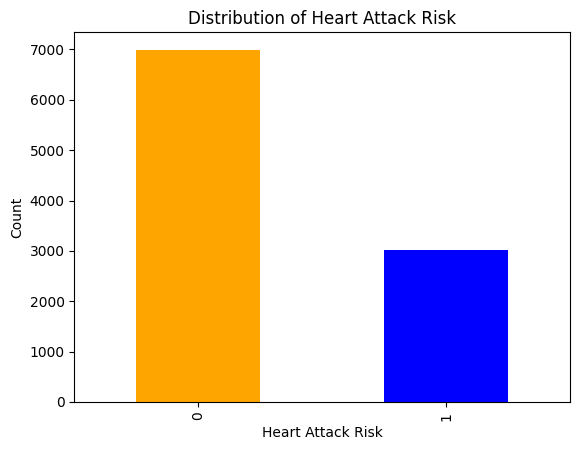

In [27]:
#Plotting some graphs for information

# 1. Risk v/s count


data['Heart_Attack_Risk'].value_counts().plot(kind='bar', color=['orange', 'blue'])

plt.xlabel("Heart Attack Risk")
plt.ylabel("Count")
plt.title("Distribution of Heart Attack Risk")
plt.show()


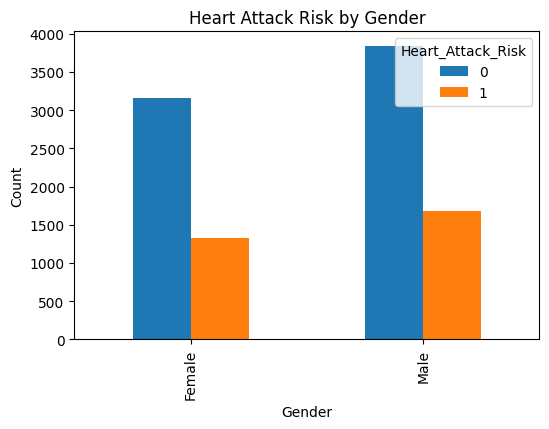

In [28]:
# 2. Gender vs Risk

grouped = data.groupby(['Gender', 'Heart_Attack_Risk']).size().unstack()

grouped.plot(kind='bar', figsize=(6,4))

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Heart Attack Risk by Gender")
plt.show()


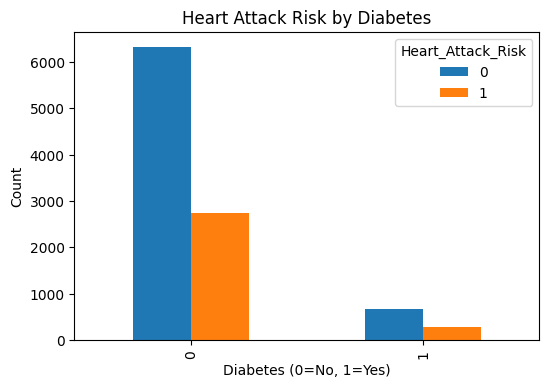

In [32]:
grouped_diabetes = data.groupby(['Diabetes','Heart_Attack_Risk']).size().unstack()
grouped_diabetes.plot(kind='bar', figsize=(6,4))
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.ylabel("Count")
plt.title("Heart Attack Risk by Diabetes")
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(data2 , y , test_size = 0.3 , random_state = 10)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [41]:
model.score(x_test , y_test) # So linear Regression is useless in this case as data is binary and not spread in diverce ways

1.0

In [44]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=1000)
model_log.fit(x_train , y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [45]:
model_log.score(x_test , y_test)

1.0

In [46]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train , y_train)

SVC()

In [47]:
model_svm.score(x_test , y_test)

0.856

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model.fit(x_train_scaled , y_train)


LinearRegression()

In [49]:
model.score(x_test_scaled , y_test)

1.0

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

RFC = RandomForestClassifier()
RFR = RandomForestRegressor()

RFC.fit(x_train , y_train)
RFR.fit(x_train , y_train)

RandomForestRegressor()

In [51]:
RFC.fit(x_train , y_train)

RandomForestClassifier()

In [52]:
RFC.score(x_test , y_test)

1.0

In [53]:
RFR.score(x_test , y_test)

1.0